In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
german = pd.read_csv("data/rwm1984.csv")
german.head()

,rownames,docvis,hospvis,edlevel,age,outwork,female,married,kids,hhninc,educ,self,edlevel1,edlevel2,edlevel3,edlevel4
0,1,1,0,3,54,0,0,1,0,3.050,15.0,0,0,0,1,0
1,2,0,0,1,44,1,1,1,0,3.050,9.0,0,1,0,0,0
2,3,0,0,1,58,1,1,0,0,1.434,11.0,0,1,0,0,0
3,4,7,2,1,64,0,0,0,0,1.500,10.5,0,1,0,0,0
4,5,6,0,3,30,1,0,0,0,2.400,13.0,0,0,0,1,0


In [3]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3874 entries, 0 to 3873
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  3874 non-null   int64  
 1   docvis    3874 non-null   int64  
 2   hospvis   3874 non-null   int64  
 3   edlevel   3874 non-null   int64  
 4   age       3874 non-null   int64  
 5   outwork   3874 non-null   int64  
 6   female    3874 non-null   int64  
 7   married   3874 non-null   int64  
 8   kids      3874 non-null   int64  
 9   hhninc    3874 non-null   float64
 10  educ      3874 non-null   float64
 11  self      3874 non-null   int64  
 12  edlevel1  3874 non-null   int64  
 13  edlevel2  3874 non-null   int64  
 14  edlevel3  3874 non-null   int64  
 15  edlevel4  3874 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 484.4 KB


In [4]:
german.describe()

,rownames,docvis,hospvis,edlevel,age,outwork,female,married,kids,hhninc,educ,self,edlevel1,edlevel2,edlevel3,edlevel4
count,3874.0000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000
mean,1937.5000,3.162881,0.121322,1.379711,43.995870,0.366546,0.479350,0.789107,0.449148,2.968786,11.090881,0.061177,0.813629,0.052401,0.074600,0.059370
std,1118.4718,6.275955,0.695784,0.860896,11.240097,0.481923,0.499638,0.407995,0.497472,1.477312,2.223268,0.239686,0.389456,0.222862,0.262779,0.236347
min,1.0000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.015000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,969.2500,0.000000,0.000000,1.000000,35.000000,0.000000,0.000000,1.000000,0.000000,2.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1937.5000,1.000000,0.000000,1.000000,44.000000,0.000000,0.000000,1.000000,0.000000,2.800000,10.500000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2905.7500,4.000000,0.000000,1.000000,54.000000,1.000000,1.000000,1.000000,1.000000,3.590000,11.500000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3874.0000,121.000000,17.000000,4.000000,64.000000,1.000000,1.000000,1.000000,1.000000,25.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
german.isnull().sum()

rownames    0
docvis      0
hospvis     0
edlevel     0
age         0
outwork     0
female      0
married     0
kids        0
hhninc      0
educ        0
self        0
edlevel1    0
edlevel2    0
edlevel3    0
edlevel4    0
dtype: int64

In [8]:
german.columns

Index(['rownames', 'docvis', 'hospvis', 'edlevel', 'age', 'outwork', 'female',
       'married', 'kids', 'hhninc', 'educ', 'self', 'edlevel1', 'edlevel2',
       'edlevel3', 'edlevel4'],
      dtype='object')

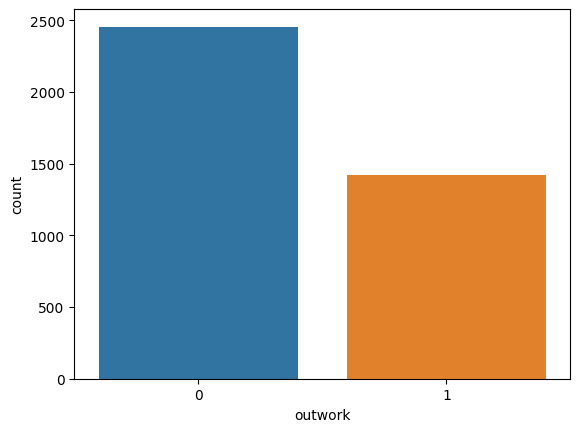

In [16]:
sns.countplot(x='outwork', data=german)
plt.show()

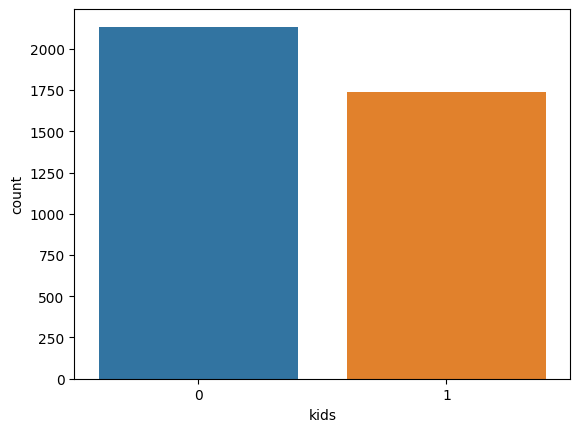

In [18]:
sns.countplot(x='kids', data=german)
plt.show()

In [ ]:
sns.countplot(x='married', data=german)
plt.show()

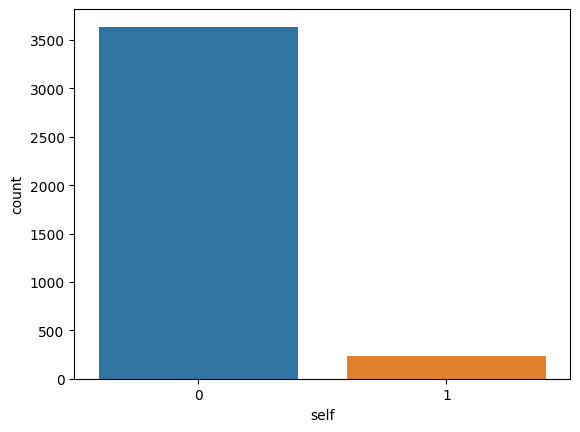

In [19]:
sns.countplot(x='self', data=german)
plt.show()

In [22]:
# dropping rownames column
german = german.drop(['rownames'], axis=1)

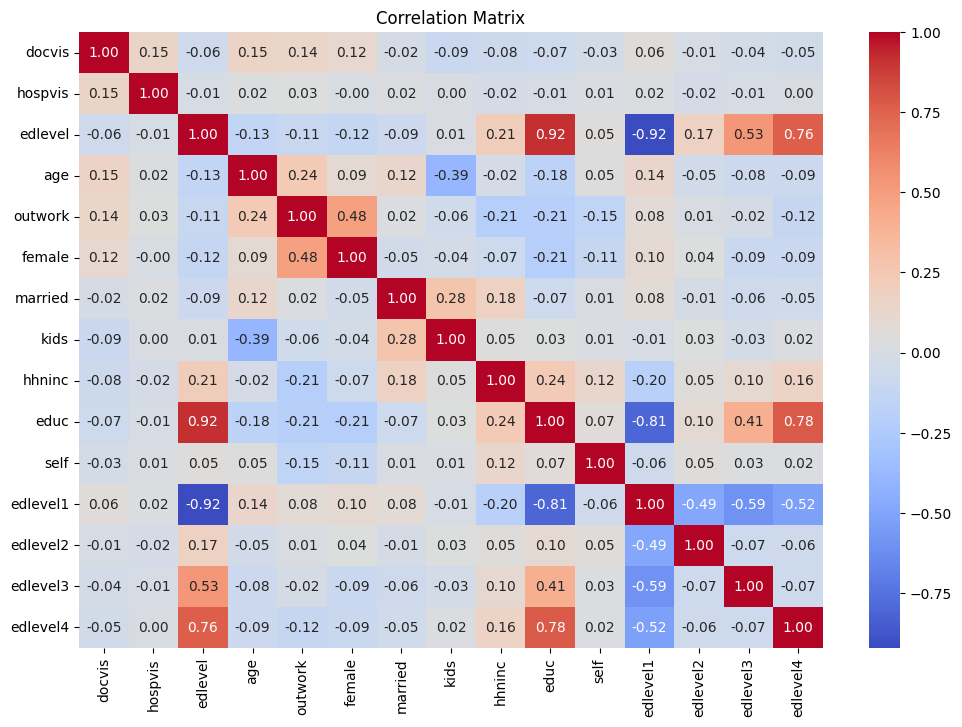

In [23]:
correlation_matrix = german.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

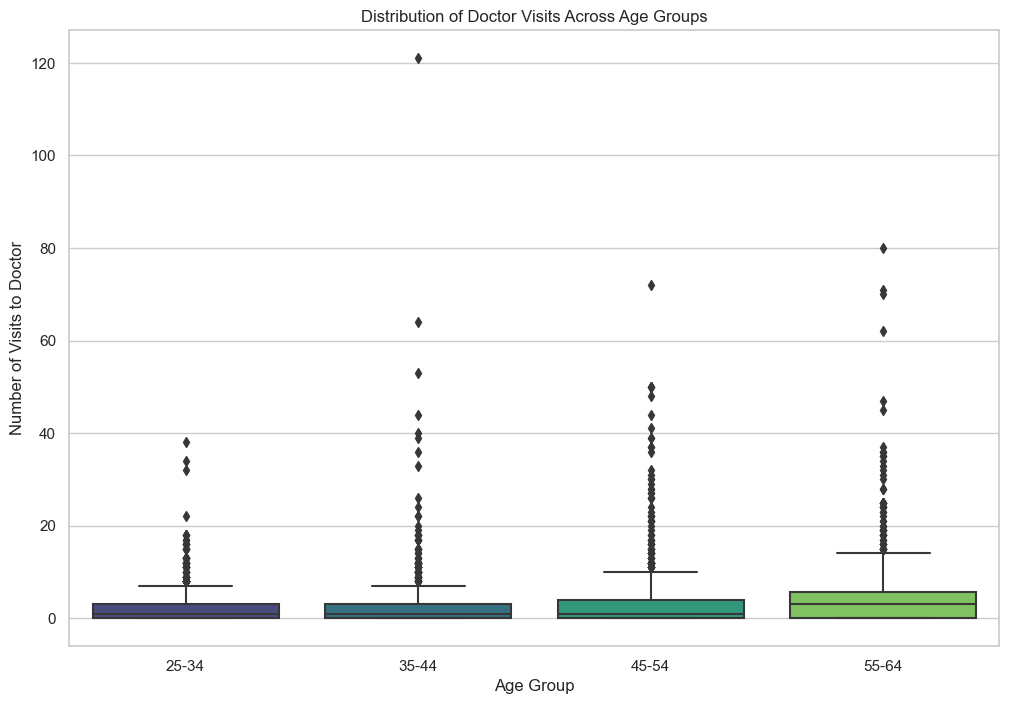

In [26]:
age_bins = [25, 35, 45, 55, 65]
age_labels = ['25-34', '35-44', '45-54', '55-64']

# Assign age groups to the DataFrame
german['age_group'] = pd.cut(german['age'], bins=age_bins, labels=age_labels, right=False)

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='docvis', data=german, palette='viridis')
plt.title('Distribution of Doctor Visits Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Visits to Doctor')
plt.show()

# Health Related Insights

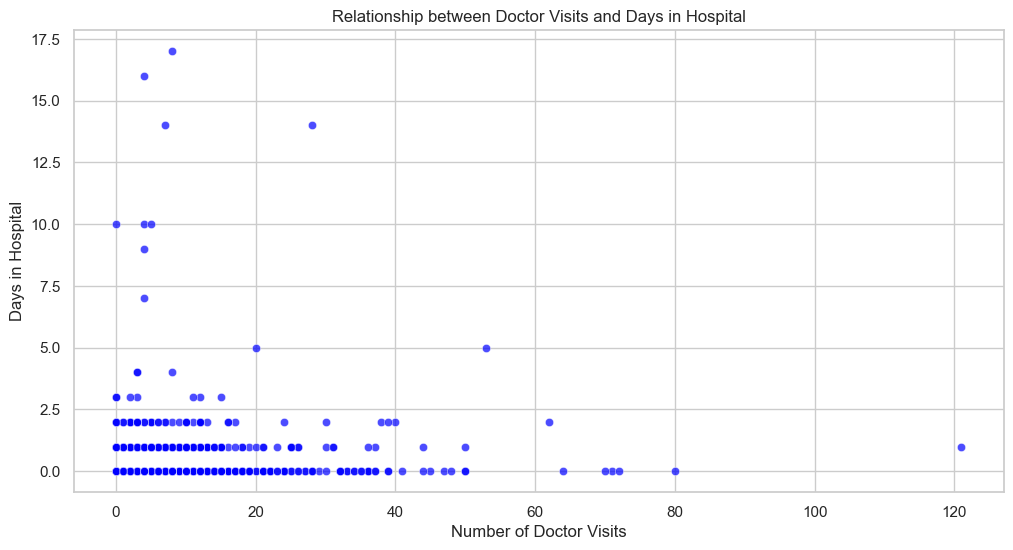

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='docvis', y='hospvis', data=german, color='blue', alpha=0.7)
plt.title('Relationship between Doctor Visits and Days in Hospital')
plt.xlabel('Number of Doctor Visits')
plt.ylabel('Days in Hospital')
plt.show()

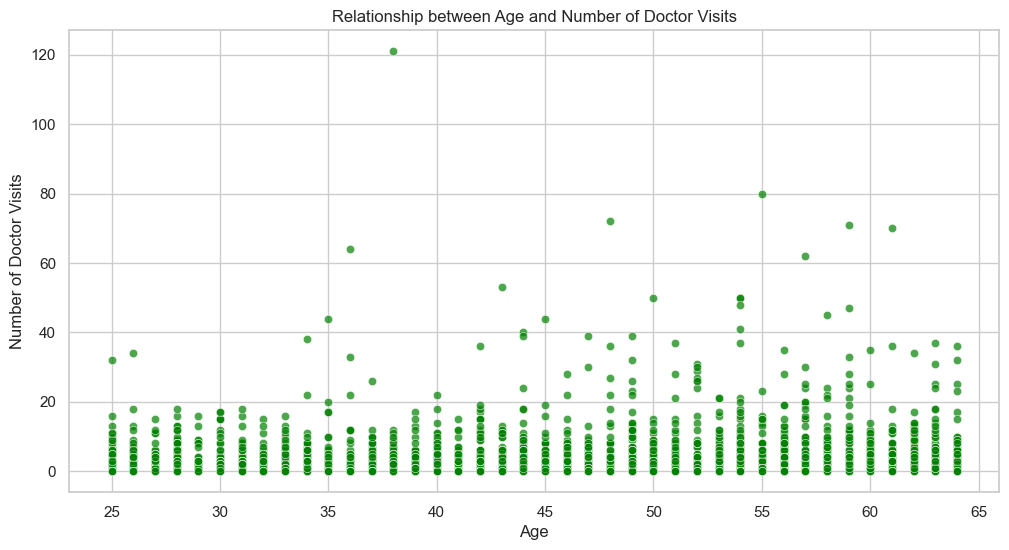

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='docvis', data=german, color='green', alpha=0.7)
plt.title('Relationship between Age and Number of Doctor Visits')
plt.xlabel('Age')
plt.ylabel('Number of Doctor Visits')
plt.show()

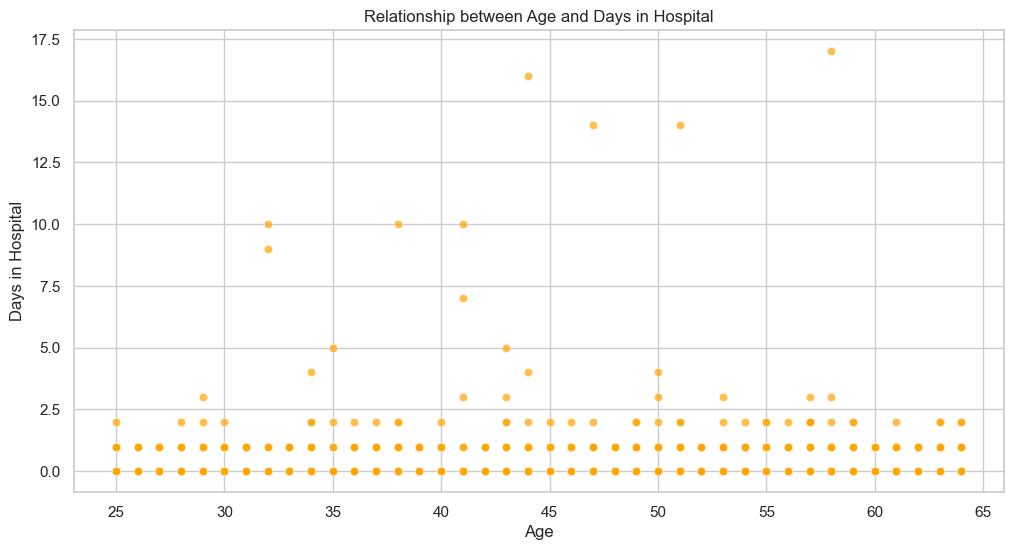

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='hospvis', data=german, color='orange', alpha=0.7)
plt.title('Relationship between Age and Days in Hospital')
plt.xlabel('Age')
plt.ylabel('Days in Hospital')
plt.show()

# Education and Health

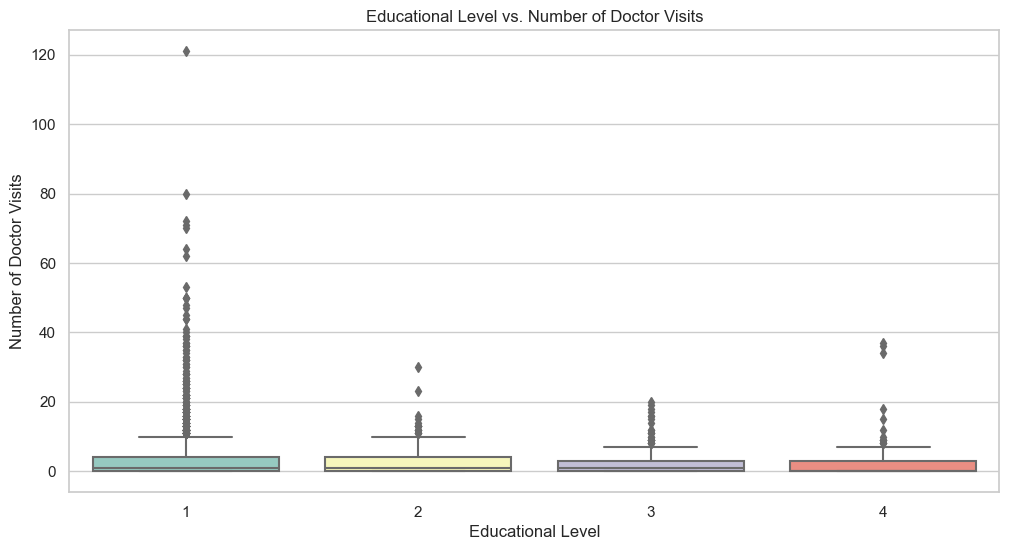

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='edlevel', y='docvis', data=german, palette='Set3')
plt.title('Educational Level vs. Number of Doctor Visits')
plt.xlabel('Educational Level')
plt.ylabel('Number of Doctor Visits')
plt.show()

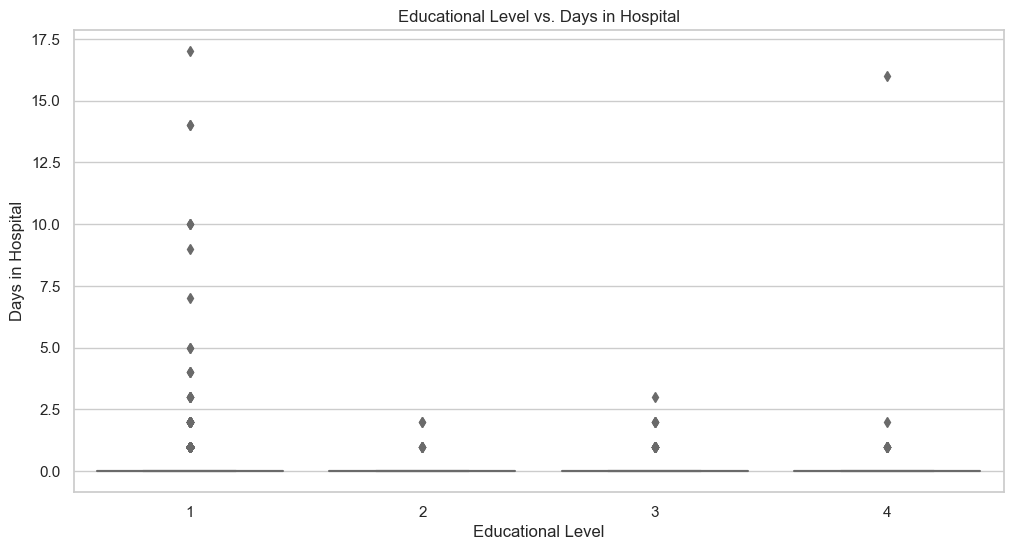

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='edlevel', y='hospvis', data=german, palette='Set3')
plt.title('Educational Level vs. Days in Hospital')
plt.xlabel('Educational Level')
plt.ylabel('Days in Hospital')
plt.show()

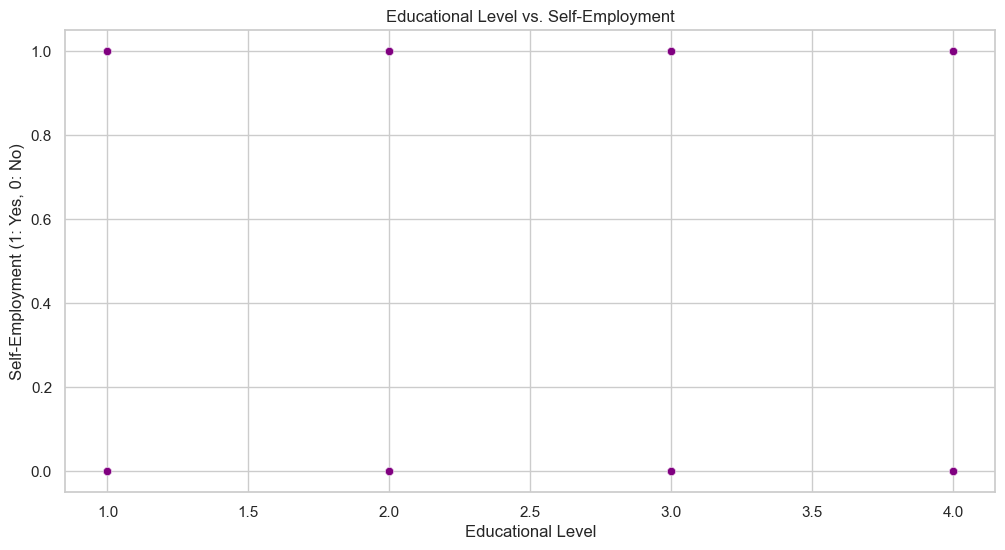

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='edlevel', y='self', data=german, color='purple', alpha=0.7)
plt.title('Educational Level vs. Self-Employment')
plt.xlabel('Educational Level')
plt.ylabel('Self-Employment (1: Yes, 0: No)')
plt.show()

# Demographic Factors

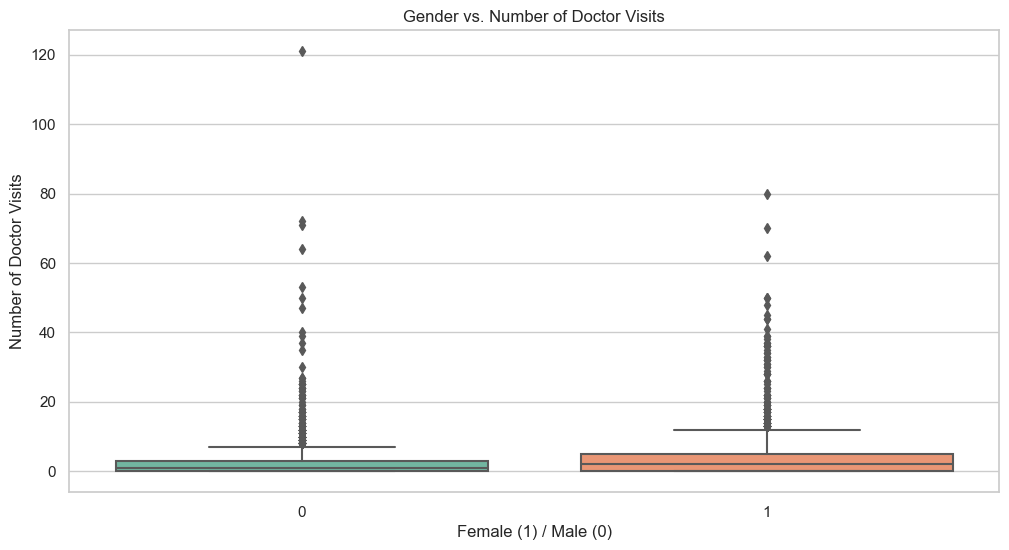

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='female', y='docvis', data=german, palette='Set2')
plt.title('Gender vs. Number of Doctor Visits')
plt.xlabel('Female (1) / Male (0)')
plt.ylabel('Number of Doctor Visits')
plt.show()

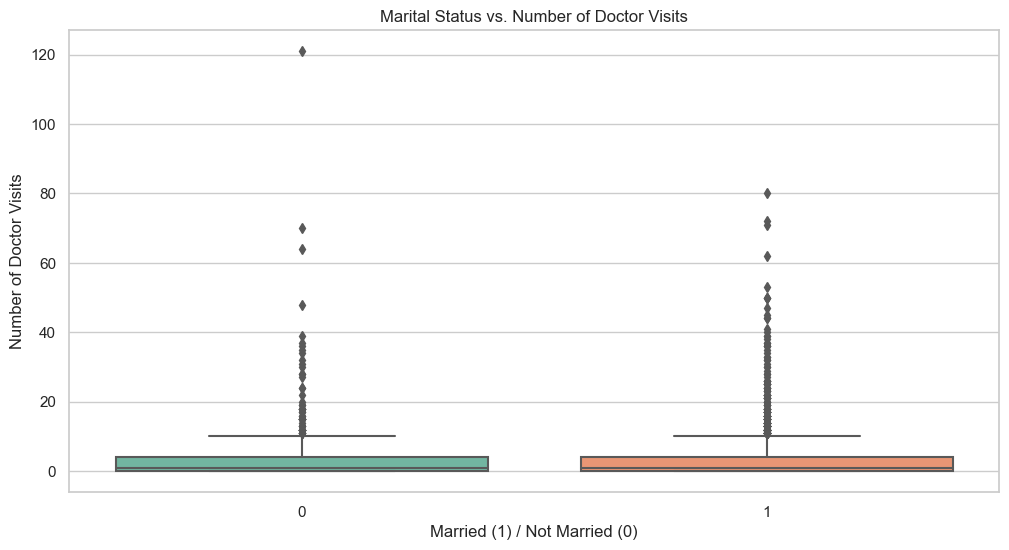

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='married', y='docvis', data=german, palette='Set2')
plt.title('Marital Status vs. Number of Doctor Visits')
plt.xlabel('Married (1) / Not Married (0)')
plt.ylabel('Number of Doctor Visits')
plt.show()

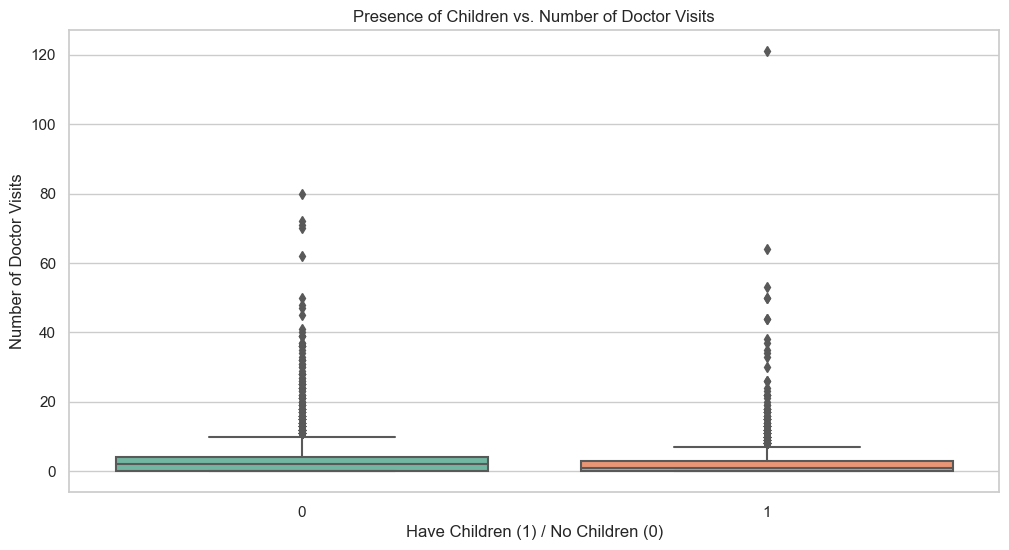

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='kids', y='docvis', data=german, palette='Set2')
plt.title('Presence of Children vs. Number of Doctor Visits')
plt.xlabel('Have Children (1) / No Children (0)')
plt.ylabel('Number of Doctor Visits')
plt.show()

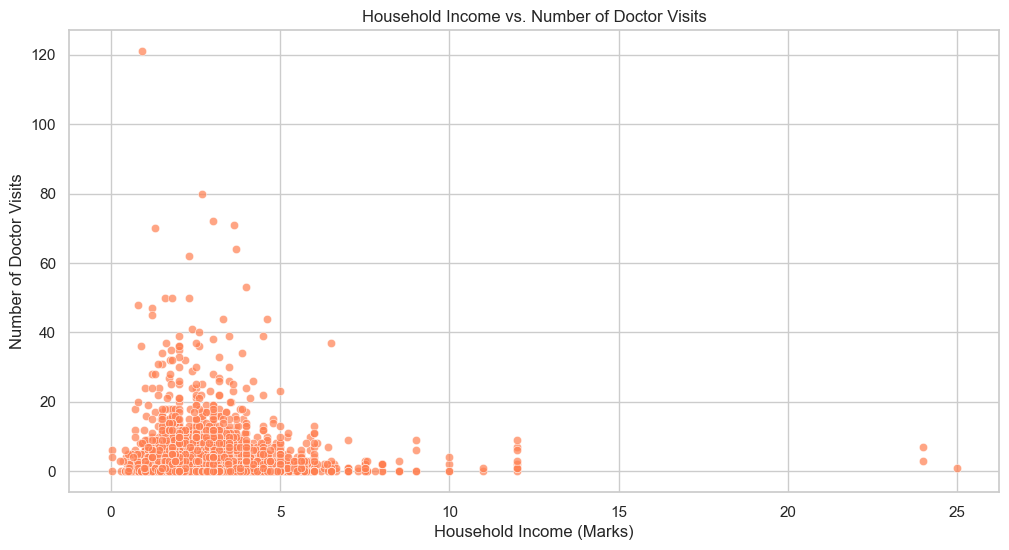

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hhninc', y='docvis', data=german, color='coral', alpha=0.7)
plt.title('Household Income vs. Number of Doctor Visits')
plt.xlabel('Household Income (Marks)')
plt.ylabel('Number of Doctor Visits')
plt.show()

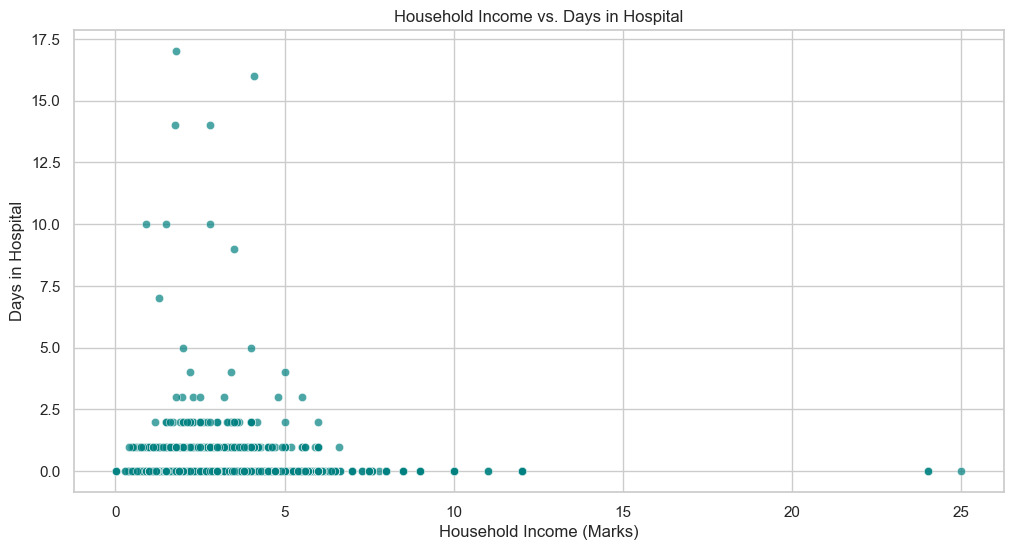

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hhninc', y='hospvis', data=german, color='teal', alpha=0.7)
plt.title('Household Income vs. Days in Hospital')
plt.xlabel('Household Income (Marks)')
plt.ylabel('Days in Hospital')
plt.show()

In [41]:
import pandas as pd
import statsmodels.api as sm

# Assuming your dataset is in a DataFrame named 'data'
# Extract relevant columns
X = german[['edlevel', 'age', 'outwork', 'female', 'married', 'kids', 'hhninc', 'educ', 'self']]
y_docvis = german['docvis']
y_hospvis = german['hospvis']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit bivariate Poisson regression for doctor visits
poisson_model_docvis = sm.GLM(y_docvis, X, family=sm.families.Poisson()).fit()

# Fit bivariate Poisson regression for hospital days
poisson_model_hospvis = sm.GLM(y_hospvis, X, family=sm.families.Poisson()).fit()

# Display regression summary for doctor visits
print("Doctor Visits Regression Summary:")
print(poisson_model_docvis.summary())

Doctor Visits Regression Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 docvis   No. Observations:                 3874
Model:                            GLM   Df Residuals:                     3864
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15429.
Date:                Fri, 08 Dec 2023   Deviance:                       23775.
Time:                        19:44:16   Pearson chi2:                 4.39e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0

In [40]:
# Display regression summary for hospital days
print("\nHospital Days Regression Summary:")
print(poisson_model_hospvis.summary())


Hospital Days Regression Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                hospvis   No. Observations:                 3874
Model:                            GLM   Df Residuals:                     3864
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1679.7
Date:                Fri, 08 Dec 2023   Deviance:                       2701.3
Time:                        19:44:00   Pearson chi2:                 1.36e+04
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01213
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.

In [44]:
german['edlevel'].value_counts()

edlevel
1    3152
3     289
4     230
2     203
Name: count, dtype: int64

In [46]:
# Checking for the assumption of poisson distribution
# mean should be equal to variance
print("Mean of Doctor Visits:", y_docvis.mean())
print("Variance of Doctor Visits:", y_docvis.var())

print("Mean of Hospital Days:", y_hospvis.mean())
print("Variance of Hospital Days:", y_hospvis.var())

Mean of Doctor Visits: 3.1628807434176562
Variance of Doctor Visits: 39.387612251717904
Mean of Hospital Days: 0.12132163138874548
Variance of Hospital Days: 0.4841153713522565


C:\Users\Alli Ajagbe\AppData\Local\Temp\ipykernel_43956\1103124807.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_docvis, kde=False, color='blue')


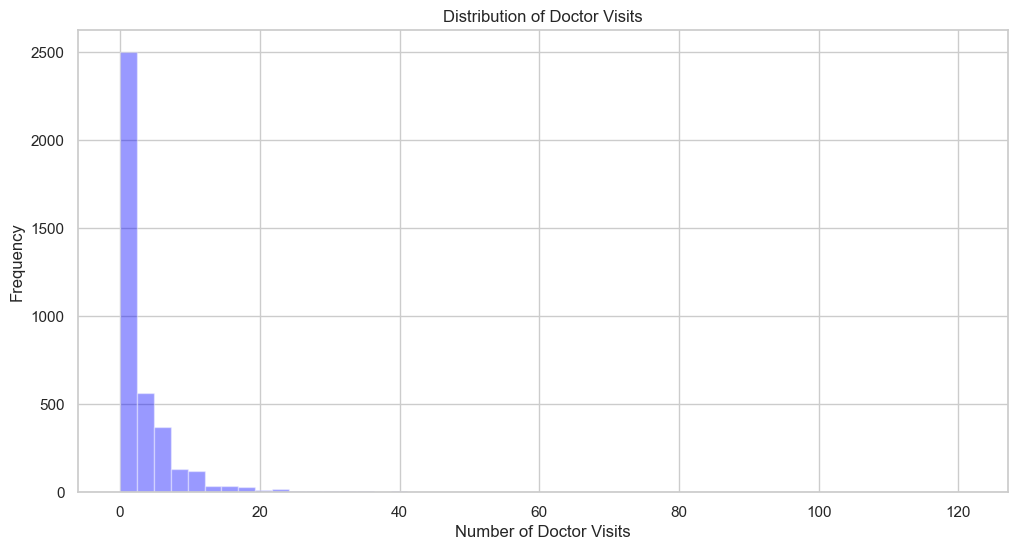

In [47]:
# plotting the distribution of doctor visits
plt.figure(figsize=(12, 6))
sns.distplot(y_docvis, kde=False, color='blue')
plt.title('Distribution of Doctor Visits')
plt.xlabel('Number of Doctor Visits')
plt.ylabel('Frequency')
plt.show()